Import files

In [1]:
import pandas as pd

users = pd.read_csv('users.csv')
campaigns = pd.read_csv('campaigns.csv')
usage = pd.read_csv('usage_metrics.csv')

print(users.columns)
print(usage.columns)
print(campaigns.columns)


Index(['user_id', 'signup_date', 'country', 'device', 'referral_code'], dtype='object')
Index(['user_id', 'week_start_date', 'sessions', 'avg_session_time',
       'engagement_score', 'last_active_date'],
      dtype='object')
Index(['campaign_id', 'user_id', 'experience_type', 'status', 'credits_used',
       'created_date', 'published_date'],
      dtype='object')


In [ ]:
#date columns to datetime
users['signup_date'] = pd.to_datetime(users['signup_date'])
usage['week_start_date'] = pd.to_datetime(usage['week_start_date'])
usage['last_active_date'] = pd.to_datetime(usage['last_active_date'])

In [ ]:
# Merged users with usage metrics
usage_users = usage.merge(users, on='user_id', how='left')
# Merged campaigns with usage_users
full_data = usage_users.merge(campaigns, on='user_id', how='left')

Exploratory analysis

device
Android    3.52951
Web        3.64557
iOS        3.53304
Name: sessions, dtype: float64
device
Android    27.911602
Web        28.719955
iOS        28.465688
Name: engagement_score, dtype: float64


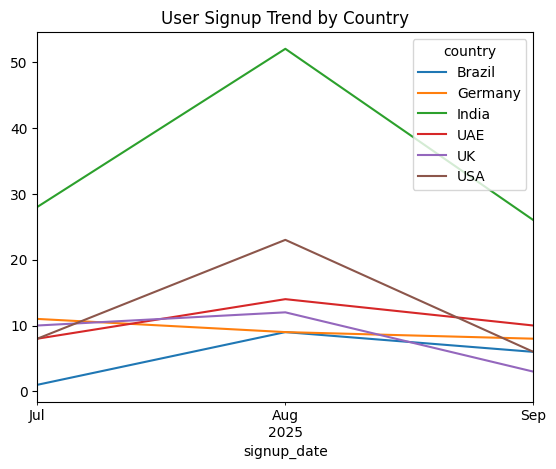

In [ ]:
# User signup trend by month and country
signup_trend = users.groupby([users['signup_date'].dt.to_period('M'), 'country'])['user_id'].count().unstack()
signup_trend.plot(kind='line', title='User Signup Trend by Country')
sessions_device = usage_users.groupby('device')['sessions'].mean()
engagement_device = usage_users.groupby('device')['engagement_score'].mean()
print(sessions_device)
print(engagement_device)



Behavioral Insights

In [ ]:
# referral flag
usage_users['is_referred'] = usage_users['referral_code'].notna()

# Engagement score by referred vs non-referred users
referral_engagement = usage_users.groupby('is_referred')['engagement_score'].mean()
print(referral_engagement)

# Sessions by campaign status
if 'status' in campaigns.columns:
    campaign_sessions = full_data.groupby('status')['sessions'].mean()
    print(campaign_sessions)

# Sessions vs credits used
if 'credits_used' in campaigns.columns:
    credits_sessions = full_data.groupby('credits_used')['sessions'].mean()
    print(credits_sessions)

is_referred
False    28.176641
True     28.163101
Name: engagement_score, dtype: float64
status
deleted      3.627986
draft        3.533657
published    3.609872
Name: sessions, dtype: float64
credits_used
1.0    3.606272
2.0    3.687500
3.0    3.783251
4.0    3.564516
5.0    3.539683
Name: sessions, dtype: float64


Experience Performance Patterns

In [7]:
if 'experience_type' in campaigns.columns:
    experience_engagement = full_data.groupby('experience_type')['engagement_score'].mean()
    print(experience_engagement)


experience_type
3D Experience          28.050761
3D Spatial             31.329616
Alpha                  27.750894
Alpha Interactive      30.015991
Prism                  28.069631
Prism Extended         26.918760
Prism Interactive      27.281490
Spatial Alpha          28.226933
Spatial Interactive    29.401438
Spatial TV             32.763288
Name: engagement_score, dtype: float64


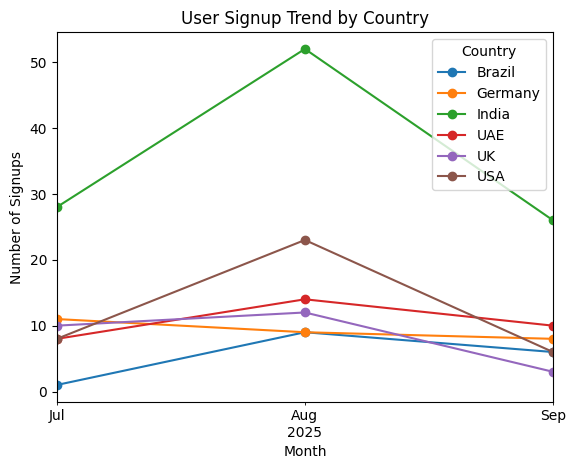

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Signup growth line chart
signup_trend = users.groupby([users['signup_date'].dt.to_period('M'), 'country'])['user_id'].count().unstack()
signup_trend.plot(kind='line', marker='o')
plt.title('User Signup Trend by Country')
plt.ylabel('Number of Signups')
plt.xlabel('Month')
plt.legend(title='Country')
plt.show()

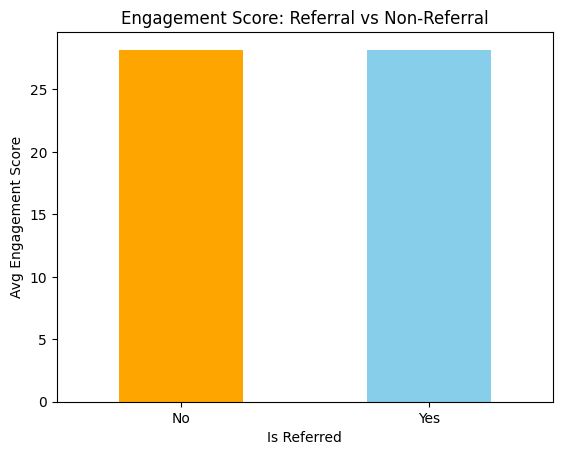

In [ ]:
# 2. Engagement comparison  referral vs non-referral (bar chart)
usage_users['is_referred'] = usage_users['referral_code'].notna()
referral_engagement = usage_users.groupby('is_referred')['engagement_score'].mean()
referral_engagement.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Engagement Score: Referral vs Non-Referral')
plt.ylabel('Avg Engagement Score')
plt.xlabel('Is Referred')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

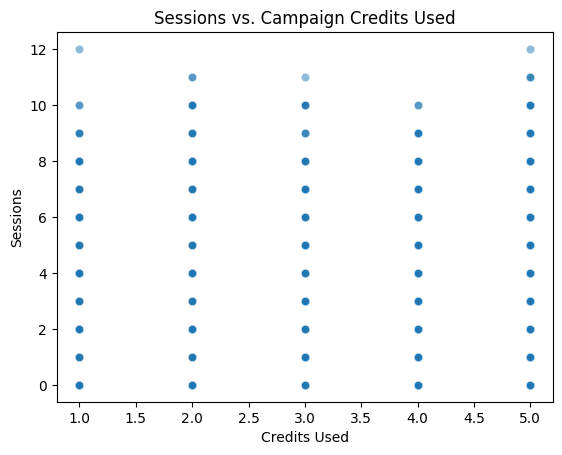

In [10]:
# 3. Sessions vs credits used (scatter plot)
if 'credits_used' in full_data.columns:
    sns.scatterplot(x='credits_used', y='sessions', data=full_data, alpha=0.5)
    plt.title('Sessions vs. Campaign Credits Used')
    plt.xlabel('Credits Used')
    plt.ylabel('Sessions')
    plt.show()

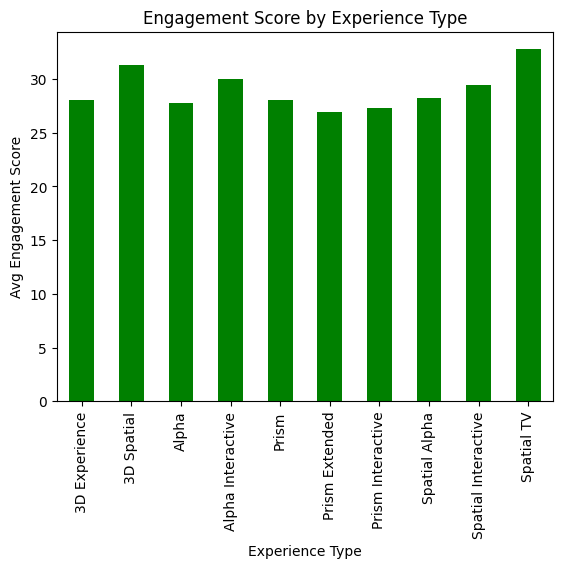

In [11]:
# 4. Engagement by experience type (bar chart)
if 'experience_type' in full_data.columns:
    exp_engagement = full_data.groupby('experience_type')['engagement_score'].mean()
    exp_engagement.plot(kind='bar', color='green')
    plt.title('Engagement Score by Experience Type')
    plt.xlabel('Experience Type')
    plt.ylabel('Avg Engagement Score')
    plt.show()

In [ ]:
# 1. Referral engagement difference
referral_engagement = usage_users.groupby('is_referred')['engagement_score'].mean()
print("Engagement Score (Referral vs Non-Referral):")
print(referral_engagement)


Engagement Score (Referral vs Non-Referral):
is_referred
False    28.176641
True     28.163101
Name: engagement_score, dtype: float64


In [13]:
# 2. Device or country with highest engagement
engage_by_device = usage_users.groupby('device')['engagement_score'].mean()
engage_by_country = usage_users.groupby('country')['engagement_score'].mean()
print("Average Engagement by Device:")
print(engage_by_device)
print("Average Engagement by Country:")
print(engage_by_country)

Average Engagement by Device:
device
Android    27.911602
Web        28.719955
iOS        28.465688
Name: engagement_score, dtype: float64
Average Engagement by Country:
country
Brazil     26.730354
Germany    27.976164
India      29.870646
UAE        24.561538
UK         26.444623
USA        29.573750
Name: engagement_score, dtype: float64


In [14]:
# 3. Campaign credits impact
if 'credits_used' in full_data.columns:
    credits_sessions = full_data.groupby('credits_used')['sessions'].mean().sort_values(ascending=False)
    print("Sessions vs Credits Used (Top):")
    print(credits_sessions.head())

Sessions vs Credits Used (Top):
credits_used
3.0    3.783251
2.0    3.687500
1.0    3.606272
4.0    3.564516
5.0    3.539683
Name: sessions, dtype: float64


In [15]:
# 4. Experience types performance
if 'experience_type' in full_data.columns:
    exp_engagement = full_data.groupby('experience_type')['engagement_score'].mean().sort_values(ascending=False)
    print("Engagement Score by Experience Type:")
    print(exp_engagement)


Engagement Score by Experience Type:
experience_type
Spatial TV             32.763288
3D Spatial             31.329616
Alpha Interactive      30.015991
Spatial Interactive    29.401438
Spatial Alpha          28.226933
Prism                  28.069631
3D Experience          28.050761
Alpha                  27.750894
Prism Interactive      27.281490
Prism Extended         26.918760
Name: engagement_score, dtype: float64
